# CycleGAN

Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2447, done.
remote: Total 2447 (delta 0), reused 0 (delta 0), pack-reused 2447
Receiving objects: 100% (2447/2447), 8.18 MiB | 17.63 MiB/s, done.
Resolving deltas: 100% (1535/1535), done.


In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, summer2winter_yosemite, horse2zebra, monet2photo, cezanne2photo, ukiyoe2photo, vangogh2photo, maps, cityscapes, facades, iphone2dslr_flower, ae_photos]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh summer2winter_yosemite

In [ ]:
!bash ./datasets/download_cyclegan_dataset.sh iphone2dslr_flower

**To do**

<font color='red'>
< download your own dataset of interest! > <br>
< note: cityscapes can't be downloaded like this ... >
</font>

In [ ]:
...

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [ ]:
!bash ./scripts/download_cyclegan_model.sh summer2winter_yosemite

In [ ]:
!bash ./scripts/download_cyclegan_model.sh winter2summer_yosemite

**To do**

<font color='red'>
< download your own model of interest! >
</font>

In [ ]:
...

# Running the model inference (Testing)

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration (and `--netG`, `--norm`, `--no_dropout`).

In [ ]:
# In between different runs - cleaning the results folder
!rm results/summer2winter_yosemite_pretrained/test_latest/images/*.png

In [ ]:
!ls results/summer2winter_yosemite_pretrained/test_latest/images/

In [ ]:
# original command
#!python test.py --dataroot datasets/summer2winter_yosemite/testA --name summer2winter_yosemite_pretrained --model test --no_dropout --use_wandb False

In [ ]:
# on another dataset
model_name = "summer2winter_yosemite_pretrained"
my_folder = "datasets/iphone2dslr_flower/testA"

!python test.py --dataroot $my_folder --name $model_name --model test --no_dropout

## Task 1: Run your selected models on some of your own data

In [ ]:
!mkdir your_own_folder

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/en/e/ea/TwinPeaks_openingshotcredits.jpg -P your_own_folder/

In [ ]:
# Task:
#   Can you input your own data?
model_name = "summer2winter_yosemite_pretrained"
my_folder = "your_own_folder"

!python test.py --dataroot $my_folder --name $model_name --model test --no_dropout

In [ ]:
!ls results/summer2winter_yosemite_pretrained/test_latest/images/TwinPeaks_openingshotcredits*

results/summer2winter_yosemite_pretrained/test_latest/images/TwinPeaks_openingshotcredits_fake.png
results/summer2winter_yosemite_pretrained/test_latest/images/TwinPeaks_openingshotcredits_real.png


## Task 2: Can you run it on a full video?

In [ ]:
# Use FFMPEG from the last code example to extract frames
# Then run the CycleGAN on the whole folder

In [ ]:
# get a youtube downloader
!sudo curl -L https://yt-dl.org/downloads/latest/youtube-dl -o /usr/local/bin/youtube-dl
!sudo chmod a+rx /usr/local/bin/youtube-dl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100     3  100     3    0     0      3      0  0:00:01 --:--:--  0:00:01     3
100     3  100     3    0     0      2      0  0:00:01  0:00:01 --:--:--     0
100   645  100   645    0     0    544      0  0:00:01  0:00:01 --:--:--   544
100 1794k  100 1794k    0     0  1289k      0  0:00:01  0:00:01 --:--:-- 1289k


In [ ]:
youtube_url = "https://www.youtube.com/watch?v=kMhrAw6xnW0" # shaky tree video

In [ ]:
# available formats?
!youtube-dl -F $youtube_url

[youtube] kMhrAw6xnW0: Downloading webpage
[youtube] kMhrAw6xnW0: Downloading MPD manifest
[info] Available formats for kMhrAw6xnW0:
format code  extension  resolution note
139          m4a        audio only DASH audio   49k , m4a_dash container, mp4a.40.5 (22050Hz), 732.55KiB
251          webm       audio only tiny   88k , webm_dash container, opus @ 88k (48000Hz), 1.30MiB
140          m4a        audio only tiny  129k , m4a_dash container, mp4a.40.2@129k (44100Hz), 1.90MiB
278          webm       256x144    DASH video   95k , webm_dash container, vp9, 24fps, video only
160          mp4        256x144    DASH video  108k , mp4_dash container, avc1.4d400b, 24fps, video only
242          webm       426x240    DASH video  220k , webm_dash container, vp9, 24fps, video only
133          mp4        426x240    DASH video  242k , mp4_dash container, avc1.4d400c, 24fps, video only
243          webm       640x360    DASH video  405k , webm_dash container, vp9, 24fps, video only
134          mp4 

In [ ]:
# Setting "136" for a 1280x720 mp4 file (this one will be slower!)
!youtube-dl -f 136 $youtube_url -o 'youtube_dataset_HQ.mp4'

[youtube] kMhrAw6xnW0: Downloading webpage
[youtube] kMhrAw6xnW0: Downloading MPD manifest
[download] Destination: youtube_dataset_HQ.mp4
[download] 100% of 33.61MiB in 07:49


In [ ]:
!rm video_frames -frd

In [ ]:
input_video = "youtube_dataset_HQ.mp4"
fps = 24 # sampling of the input
!mkdir video_frames
!ffmpeg -i $input_video -vf fps=$fps video_frames/%04d.jpg    # video 2 frames

In [ ]:
import glob, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

folder = "video_frames/*"
files = glob.glob(folder)
#files.sort()

print("total", len(files),"files!")
random.shuffle(files)

plt.figure(figsize=(10,6))
columns = 5
show_subset = 10

for i, img_path in enumerate(files[:show_subset]):
    image = mpimg.imread(img_path)
    print(img_path, "=", image.shape)

    plt.subplot(show_subset / columns + 1, columns, i + 1)
    plt.imshow(image)

In [ ]:
# on another dataset
model_name = "winter2summer_yosemite_pretrained"
my_folder = "video_frames"

!python test.py --dataroot $my_folder --name $model_name --model test --no_dropout --num_test 2946

# Visualize

## Normal functioning:

In [ ]:
!ls ./results/summer2winter_yosemite_pretrained/test_latest/images/

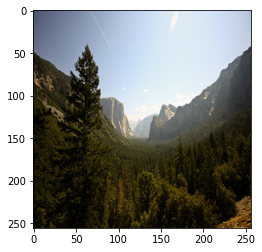

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/summer2winter_yosemite_pretrained/test_latest/images/2010-09-07 12:23:20_real.png')
plt.imshow(img)
# source image:

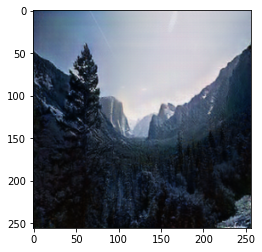

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/summer2winter_yosemite_pretrained/test_latest/images/2010-09-07 12:23:20_fake.png')
plt.imshow(img)
# made into winter:

## On another dataset

In [ ]:
!ls ./results/summer2winter_yosemite_pretrained/test_latest/images/

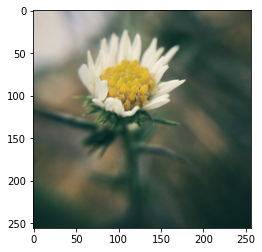

In [ ]:
import matplotlib.pyplot as plt

image_name = "c1.staticflickr.com-1-274-32601014780_57dbcb365f"

img = plt.imread('./results/summer2winter_yosemite_pretrained/test_latest/images/'+image_name+'_real.png')
plt.imshow(img)
# original image:

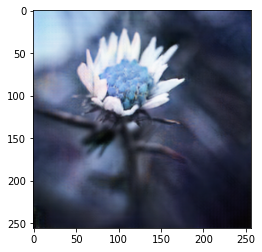

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/summer2winter_yosemite_pretrained/test_latest/images/'+image_name+'_fake.png')
plt.imshow(img) 
# <<< flower turned into winter mode!

## On another image

In [ ]:
!ls ./results/summer2winter_yosemite_pretrained/test_latest/images/Twin*

./results/summer2winter_yosemite_pretrained/test_latest/images/TwinPeaks_openingshotcredits_fake.png
./results/summer2winter_yosemite_pretrained/test_latest/images/TwinPeaks_openingshotcredits_real.png


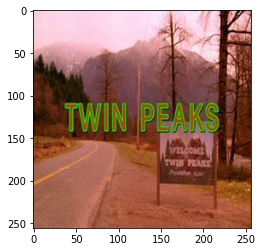

In [ ]:
import matplotlib.pyplot as plt

image_name = "TwinPeaks_openingshotcredits"

img = plt.imread('./results/summer2winter_yosemite_pretrained/test_latest/images/'+image_name+'_real.png')
plt.imshow(img)
# original image:

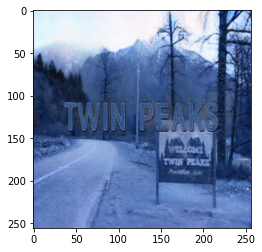

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/summer2winter_yosemite_pretrained/test_latest/images/'+image_name+'_fake.png')
plt.imshow(img) 
# <<< flower turned into winter mode!

## On video

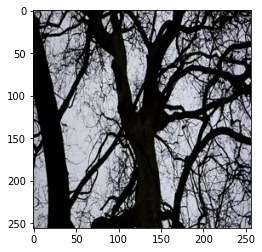

In [ ]:
import matplotlib.pyplot as plt

image_name = "0001"

img = plt.imread('./results/winter2summer_yosemite_pretrained/test_latest/images/'+image_name+'_real.png')
plt.imshow(img)
# original image:

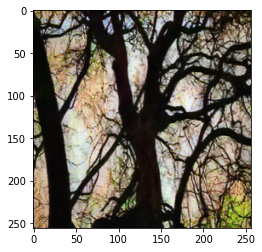

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/winter2summer_yosemite_pretrained/test_latest/images/'+image_name+'_fake.png')
plt.imshow(img) 
# <<< sample frame translated!

total 2946 files!
results/winter2summer_yosemite_pretrained/test_latest/images/2814_fake.png = (256, 256, 3)
results/winter2summer_yosemite_pretrained/test_latest/images/1404_fake.png = (256, 256, 3)
results/winter2summer_yosemite_pretrained/test_latest/images/2905_fake.png = (256, 256, 3)
results/winter2summer_yosemite_pretrained/test_latest/images/2417_fake.png = (256, 256, 3)
results/winter2summer_yosemite_pretrained/test_latest/images/0259_fake.png = (256, 256, 3)
results/winter2summer_yosemite_pretrained/test_latest/images/0736_fake.png = (256, 256, 3)
results/winter2summer_yosemite_pretrained/test_latest/images/2104_fake.png = (256, 256, 3)
results/winter2summer_yosemite_pretrained/test_latest/images/2802_fake.png = (256, 256, 3)
results/winter2summer_yosemite_pretrained/test_latest/images/0226_fake.png = (256, 256, 3)
results/winter2summer_yosemite_pretrained/test_latest/images/1609_fake.png = (256, 256, 3)


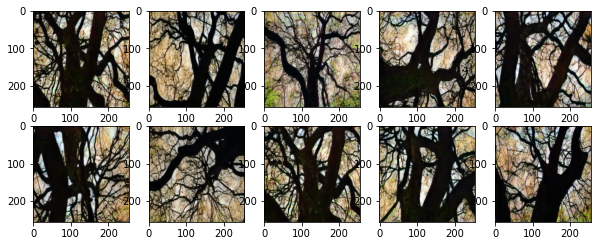

In [ ]:
import glob, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

folder = "results/winter2summer_yosemite_pretrained/test_latest/images/*_fake.png"
files = glob.glob(folder)
#files.sort()

print("total", len(files),"files!")
random.shuffle(files)

plt.figure(figsize=(10,6))
columns = 5
show_subset = 10

for i, img_path in enumerate(files[:show_subset]):
    image = mpimg.imread(img_path)
    print(img_path, "=", image.shape)

    plt.subplot(show_subset / columns + 1, columns, i + 1)
    plt.imshow(image)

In [ ]:
!ls results/winter2summer_yosemite_pretrained/test_latest/images/*_fake.png

In [ ]:
!ffmpeg -framerate 24 -pattern_type glob -i 'results/winter2summer_yosemite_pretrained/test_latest/images/*_fake.png' -c:v libx264 -pix_fmt yuv420p output_720_longer.mp4

print("finished and generated - output.mp4")
!ls -luah *.mp4

# Training (sadly too slow to do in the class)

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [ ]:
!nvidia-smi
# maybe we can have bigger batch size? (batch_size: 1 == 26 min / epoch right now!)
# set save interval to 1

In [ ]:
!python train.py --dataroot ./datasets/summer2winter_yosemite --name summer2winter_yosemite --model cycle_gan --use_wandb

In [ ]:
!ls checkpoints/summer2winter_yosemite

latest_net_D_A.pth  latest_net_G_A.pth	loss_log.txt   web
latest_net_D_B.pth  latest_net_G_B.pth	train_opt.txt


In [ ]:
!zip -r summer2winter_yosemite_5epochs.zip checkpoints/summer2winter_yosemite